# Stock Market Analysis with Sentiment Analysis and Time Series



## Textual Analysis: Sentiment Analysis using the Finbert Model

In [ ]:
#Importing relevant libaries
import pandas as pd
import numpy as np
!pip install yahoo_fin neuralprophet
from neuralprophet import NeuralProphet
from yahoo_fin import news
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
import seaborn as sns

In [24]:
# Get news for Apple
ticker = 'AAPL'
news_articles = news.get_yf_rss(ticker)

news_data = []
for article in news_articles:
    news_dict = {
        "title": article['title'],
        "description": article['summary']
    }
    news_data.append(news_dict)
data= pd.DataFrame(news_data)
combined_text= data['title']+' '+data['description']
pd.set_option('display.max_colwidth', 100)
combined_text

0     Nvidia Just Passed Microsoft to Become the World's Most Valuable Stock. Here's What History Says...
1     AI crypto tokens rally after Nvidia's record gains AI-related cryptocurrency tokens have rallied...
2     Nvidia’s surge reveals a pitfall of passive investing: Morning Brief A quirk with one of the mos...
3     Forget Nvidia: Prominent Billionaires Are Selling It and Piling Into These 4 Artificial Intellig...
4     Why Apple's Strategy for Artificial Intelligence Makes the Stock a No-Brainer Buy Focusing on pr...
5     This Undervalued Stock Could Join Nvidia in the $3 Trillion Club Here's why Alphabet has what it...
6     Nvidia now ahead in Big Tech race to $4 trillion - Wedbush Nvidia (NASDAQ:NVDA) became the world...
7     For Apple’s AI Push, China Is a Missing Piece ChatGPT and other Western AI models aren’t availab...
8          Are stocks about to stall? As Nvidia's stock hits records, here are some key signals to watch.
9     Apple The Exchange TRX to welcome its fi

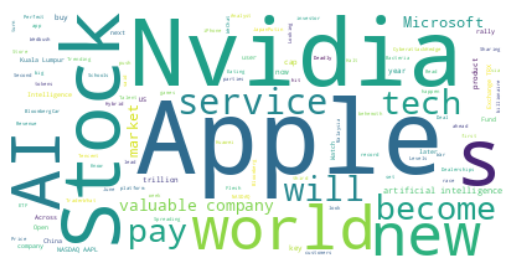

In [3]:
text_data = ' '.join(combined_text.astype(str))
wordcloud= WordCloud(background_color="white").generate(text_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Load sentiment analysis pipeline
sentiment_classifier = pipeline("sentiment-analysis", model="ProsusAI/finbert")
results= []
for i in range(20):
  x= sentiment_classifier(combined_text[i])
  results.append(x)

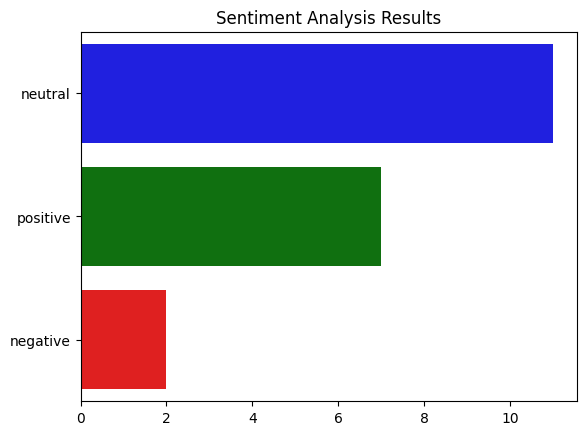

In [22]:
#Visualizing Sentiment Analysis Results
labels = [result[0]['label'] for result in results]
sns.countplot(y=labels, hue=labels, palette={'positive': 'green', 'negative': 'red', 'neutral': 'blue'}, dodge=False, legend=False)
plt.title('Sentiment Analysis Results')
plt.xlabel('')
plt.show()

## Numerical Analysis: Predicting stock price with NeuralProphet

In [6]:
#Taking Historical data from the year 2008 until present
from yahoo_fin import stock_info as si
stock_data = si.get_data(ticker)
stock_data = stock_data[stock_data.index >= '2008-01-01']
stock_data.head()

,open,high,low,close,adjclose,volume,ticker
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.891123,1079178800,AAPL
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.893844,842066400,AAPL
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.443937,1455832000,AAPL
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.371069,2072193200,AAPL
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.177862,1523816000,AAPL


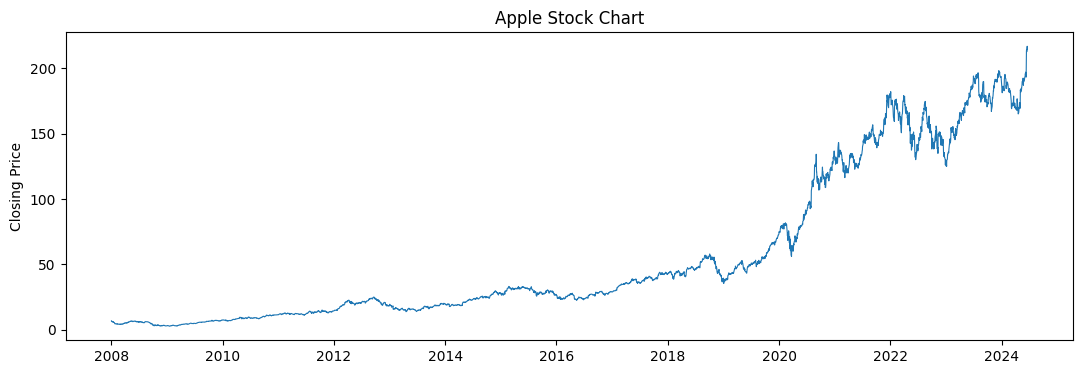

In [7]:
#Visualizing the Stock Chart
plt.figure(figsize=(13, 4))
sns.lineplot(data= stock_data, x= stock_data.index, y='close', linewidth=0.8)
plt.title("Apple Stock Chart")
plt.xlabel("")
plt.ylabel("Closing Price")
plt.show()

In [8]:
#Fitting the model
model = NeuralProphet()
stock_data= stock_data.reset_index()
data= stock_data[['index', 'close']]
data.columns= ['ds', 'y']
model.fit(data)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.356% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.356% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.co

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,146.897919,179.045471,0.573338,0.0,0
1,79.265396,99.548569,0.271074,0.0,1
2,35.225166,43.002682,0.080757,0.0,2
3,26.702515,30.159931,0.043540,0.0,3
4,19.468887,23.941502,0.028746,0.0,4
...,...,...,...,...,...
65,6.506476,9.832726,0.005111,0.0,65
66,6.508646,9.815611,0.005116,0.0,66
67,6.443263,9.809980,0.005103,0.0,67
68,6.474303,9.808313,0.005107,0.0,68


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.356% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.356% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 65it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.356% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.356% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.356% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.356% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 65it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


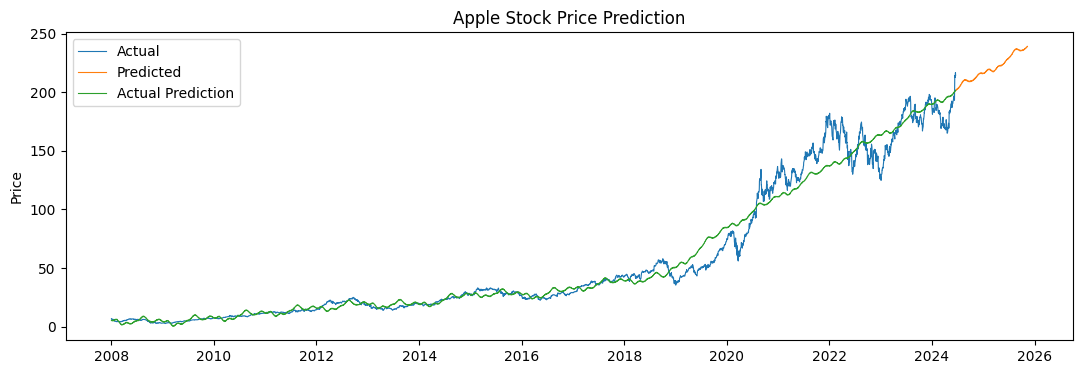

In [9]:
future = model.make_future_dataframe(data, periods=365)
forecast = model.predict(future)
actual_prediction= model.predict(data)
plt.figure(figsize=(13, 4))
plt.plot(data['ds'], data['y'], label='Actual', linewidth=0.8)
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted', linewidth=0.8)
plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label='Actual Prediction', linewidth=0.8)
plt.title('Apple Stock Price Prediction')
plt.ylabel('Price')
plt.legend()
plt.show()


**Conclusion and Recommendation**
* This is **NOT** financial advice.
* Sentiment analysis changes everytime the code runs because it takes the latest news using the yahoo finance API
* As of June 20 2024, most of the news have a neutral sentiment towards APPL
* Time Series Analysis shows that APPL will continue to raise its stock price. It will have its ups and downs but overall APPL will be bullish.
* With the recent news about APPL partnering with OpenAI, and Elon Musk's disapproval with their decision I would recommend to be very careful trading this stock especially because Elon has been historically known to drastically move a stock's price with his tweet alone (ex. DogeCoin).